<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Homework-5/HW5_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: please use SGD and ADAM optimizers for each Problem in the homework. Make sure to compare the obtained results between SGD and ADAM.

**Problem 3 (30 pts):**

Repeat all sections of problem 2 using all the input features from the housing price dataset.

Problem 2 (40 pts):

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model based on the above input variables. In this case, you will have six parameters:

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.

2.c. Compare your results against the linear regression done in homework 1. Do you see meaningful differences?

In [ ]:
#Using modified Temperature example from 'Deep-Learning-with_PyTorch' in Chapter 2 'Pretrained Networks'.
#Using modified Temperature example "Deep Learning with PyTorch: Optimizers How our models learn!" at https://www.greghilston.com/post/3_optimizers/
#Using modified examples for loss from "Mastering PyTorch Loss Functions: The Complete How-To" at https://www.projectpro.io/article/pytorch-loss-functions/880
#Using modified examples for loss from "Noetebook Community: Linear Regression" at https://notebook.community/aidiary/notebooks/pytorch/180130-linear-regression
#Using modified examples for loss from "PyTorch Basics: Tensors & Gradients" at https://www.evanmarie.com/content/files/notebooks/deep_learning_zero_to_gans_pdf.pdf

In [ ]:
from matplotlib import pyplot as plt     # Data Visualisation
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data from .csv file of guithub repository
housing = pd.read_csv('https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Datacheck
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
varlist2 = ['furnishingstatus']

# Defining the map function
def furnishing_map(a):
    return a.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Applying the function to the housing list
housing[varlist2] = housing[varlist2].apply(furnishing_map)

# Datacheck
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
#selected input variables: ALL
num_vars = ['price', 'area','bedrooms',	'bathrooms', 'stories',	'mainroad',	'guestroom', 'basement', 'hotwaterheating',	'airconditioning', 'parking',	'prefarea',	'furnishingstatus']
new_df = housing[num_vars]
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
new_df.shape

(545, 13)

In [ ]:
#Normalization
scaler = MinMaxScaler()
#scaler = StandardScaler()
new_df[num_vars] = scaler.fit_transform(new_df[num_vars])
new_df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
5,0.787879,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.5
6,0.727273,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
7,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.703030,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
9,0.696970,0.281787,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0


In [ ]:
X = new_df.iloc[:, 1:13].values
Y = new_df.iloc[:, 0].values

In [ ]:
#Tensor Conversion
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
#Defining the model
def model(X, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, B):
    return W12*X[:,11] + W11*X[:,10] + W10*X[:,9] + W9*X[:,8] + W8*X[:,7] + W7*X[:,6] + W6*X[:,5] + W5*X[:,4] + W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B

In [ ]:
#Mean Squared Error (MSE)
#YP = Predicted Y
def loss_fn(YP, Y):
    squared_diffs = (YP - Y)**2
    return squared_diffs.mean()

In [ ]:
#Defining the weights and biases as arrays of ones and zeros
W2 = torch.ones(())
W3 = torch.ones(())
W4 = torch.ones(())
W5 = torch.ones(())
W6 = torch.ones(())
W7 = torch.ones(())
W8 = torch.ones(())
W9 = torch.ones(())
W10 = torch.ones(())
W11 = torch.ones(())
W12 = torch.ones(())
B = torch.zeros(())

In [ ]:
#80% (training) and 20% (validation) split
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

#shuffling dataset
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [ ]:
train_X = X[train_indices]
train_Y = Y[train_indices]

val_X = X[val_indices]
val_Y = Y[val_indices]

In [ ]:
train_X.size()

torch.Size([436, 12])

In [ ]:
#Define Training loop
def training_loop(n_epochs, optimizer, params, train_X, val_X, train_Y, val_Y):

    for epoch in range(1, n_epochs + 1):
        train_YP = model(train_X, *params)
        train_loss = loss_fn(train_YP, train_Y)

        val_YP = model(val_X, *params)
        val_loss = loss_fn(val_YP, val_Y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.1')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.1
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 0.0086, Validation loss 0.0101
Epoch 1000, Training loss 0.0082, Validation loss 0.0095
Epoch 1500, Training loss 0.0082, Validation loss 0.0094
Epoch 2000, Training loss 0.0082, Validation loss 0.0094
Epoch 2500, Training loss 0.0082, Validation loss 0.0094
Epoch 3000, Training loss 0.0082, Validation loss 0.0094
Epoch 3500, Training loss 0.0082, Validation loss 0.0094
Epoch 4000, Training loss 0.0082, Validation loss 0.0094
Epoch 4500, Training loss 0.0082, Validation loss 0.0094
Epoch 5000, Training loss 0.0082, Validation loss 0.0094


tensor([ 0.3250,  0.0477,  0.2374,  0.1294,  0.0266,  0.0281,  0.0351,  0.0849,
         0.0769,  0.0816,  0.0612,  0.0301, -0.0107], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.1')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.1
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 0.0082, Validation loss 0.0094
Epoch 1000, Training loss 0.0082, Validation loss 0.0094
Epoch 1500, Training loss 0.0082, Validation loss 0.0094
Epoch 2000, Training loss 0.0082, Validation loss 0.0094
Epoch 2500, Training loss 0.0082, Validation loss 0.0094
Epoch 3000, Training loss 0.0082, Validation loss 0.0094
Epoch 3500, Training loss 0.0082, Validation loss 0.0094
Epoch 4000, Training loss 0.0082, Validation loss 0.0094
Epoch 4500, Training loss 0.0082, Validation loss 0.0094
Epoch 5000, Training loss 0.0082, Validation loss 0.0094


tensor([ 0.3249,  0.0477,  0.2374,  0.1294,  0.0266,  0.0281,  0.0351,  0.0849,
         0.0769,  0.0816,  0.0612,  0.0301, -0.0107], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)   #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.01')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.01
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 0.0639, Validation loss 0.0849
Epoch 1000, Training loss 0.0252, Validation loss 0.0344
Epoch 1500, Training loss 0.0153, Validation loss 0.0207
Epoch 2000, Training loss 0.0118, Validation loss 0.0155
Epoch 2500, Training loss 0.0103, Validation loss 0.0131
Epoch 3000, Training loss 0.0096, Validation loss 0.0119
Epoch 3500, Training loss 0.0091, Validation loss 0.0111
Epoch 4000, Training loss 0.0089, Validation loss 0.0107
Epoch 4500, Training loss 0.0087, Validation loss 0.0104
Epoch 5000, Training loss 0.0086, Validation loss 0.0101


tensor([ 0.3997,  0.1832,  0.2252,  0.0963,  0.0367,  0.0239,  0.0297,  0.0962,
         0.0770,  0.0606,  0.0555,  0.0267, -0.0709], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)   #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.01')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.01
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 0.0277, Validation loss 0.0359
Epoch 1000, Training loss 0.0142, Validation loss 0.0169
Epoch 1500, Training loss 0.0103, Validation loss 0.0121
Epoch 2000, Training loss 0.0089, Validation loss 0.0103
Epoch 2500, Training loss 0.0084, Validation loss 0.0097
Epoch 3000, Training loss 0.0082, Validation loss 0.0095
Epoch 3500, Training loss 0.0082, Validation loss 0.0094
Epoch 4000, Training loss 0.0082, Validation loss 0.0094
Epoch 4500, Training loss 0.0082, Validation loss 0.0094
Epoch 5000, Training loss 0.0082, Validation loss 0.0094


tensor([ 0.3250,  0.0478,  0.2374,  0.1294,  0.0267,  0.0281,  0.0351,  0.0849,
         0.0769,  0.0816,  0.0612,  0.0301, -0.0108], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.001
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 0.4820, Validation loss 0.5519
Epoch 1000, Training loss 0.3150, Validation loss 0.3869
Epoch 1500, Training loss 0.2371, Validation loss 0.2964
Epoch 2000, Training loss 0.1838, Validation loss 0.2329
Epoch 2500, Training loss 0.1464, Validation loss 0.1877
Epoch 3000, Training loss 0.1195, Validation loss 0.1548
Epoch 3500, Training loss 0.0996, Validation loss 0.1301
Epoch 4000, Training loss 0.0846, Validation loss 0.1113
Epoch 4500, Training loss 0.0730, Validation loss 0.0966
Epoch 5000, Training loss 0.0638, Validation loss 0.0848


tensor([ 0.6035,  0.4774,  0.5639,  0.3220,  0.1209,  0.0961,  0.0567,  0.6677,
         0.0526,  0.2885,  0.1351,  0.0834, -0.5759], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.001
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 2.9310, Validation loss 2.7043
Epoch 1000, Training loss 0.3613, Validation loss 0.3448
Epoch 1500, Training loss 0.0867, Validation loss 0.1060
Epoch 2000, Training loss 0.0615, Validation loss 0.0819
Epoch 2500, Training loss 0.0477, Validation loss 0.0643
Epoch 3000, Training loss 0.0373, Validation loss 0.0499
Epoch 3500, Training loss 0.0298, Validation loss 0.0391
Epoch 4000, Training loss 0.0244, Validation loss 0.0310
Epoch 4500, Training loss 0.0203, Validation loss 0.0251
Epoch 5000, Training loss 0.0171, Validation loss 0.0207


tensor([ 0.3285,  0.3971,  0.1360,  0.1506,  0.2439,  0.0061,  0.0641,  0.1022,
         0.0745,  0.0766,  0.0356,  0.0826, -0.3761], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.0001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.0001
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 8.4146, Validation loss 7.8372
Epoch 1000, Training loss 5.0476, Validation loss 4.7181
Epoch 1500, Training loss 3.1120, Validation loss 2.9345
Epoch 2000, Training loss 1.9962, Validation loss 1.9132
Epoch 2500, Training loss 1.3501, Validation loss 1.3265
Epoch 3000, Training loss 0.9734, Validation loss 0.9875
Epoch 3500, Training loss 0.7511, Validation loss 0.7893
Epoch 4000, Training loss 0.6175, Validation loss 0.6712
Epoch 4500, Training loss 0.5350, Validation loss 0.5986
Epoch 5000, Training loss 0.4820, Validation loss 0.5518


tensor([ 0.6925,  0.5162,  0.8240,  0.5967, -0.0361,  0.6007,  0.4064,  0.9208,
         0.4236,  0.6411,  0.5510,  0.3235, -1.0814], requires_grad=True)

In [ ]:
#Initializing the parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.0001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.0001
Epoch 1, Training loss 14.2654, Validation loss 13.2808
Epoch 500, Training loss 12.4780, Validation loss 11.6080
Epoch 1000, Training loss 10.8552, Validation loss 10.0904
Epoch 1500, Training loss 9.3852, Validation loss 8.7165
Epoch 2000, Training loss 8.0550, Validation loss 7.4742
Epoch 2500, Training loss 6.8538, Validation loss 6.3535
Epoch 3000, Training loss 5.7733, Validation loss 5.3463
Epoch 3500, Training loss 4.8064, Validation loss 4.4461
Epoch 4000, Training loss 3.9472, Validation loss 3.6473
Epoch 4500, Training loss 3.1907, Validation loss 2.9451
Epoch 5000, Training loss 2.5322, Validation loss 2.3351


tensor([ 0.5592,  0.5599,  0.5572,  0.5589,  0.5595,  0.5543,  0.5560,  0.5585,
         0.5566,  0.5577,  0.5557,  0.5580, -0.4390], requires_grad=True)

HW2_P3B - Redone to include 'furnishingstatus' (was not included in oringinal HW)

The cost for given values of theta_0 through theta_13 = 0.4000000000000002
The cost for given values of theta_0 through theta_13 = 0.10000000000000002
Final value of theta = [-0.15382282  0.25885043 -0.00954972  0.27273653  0.10615858  0.02788426
  0.01105046 -0.02564162 -0.04607011  0.12472486  0.03723117  0.04895423
  0.01816123]
cost_history = [0.29062428 0.24513117 0.22364576 ... 0.19366316 0.19366316 0.19366316]
test_cost_history = [0.07012478 0.05790527 0.05222841 ... 0.04753305 0.04753305 0.04753305]


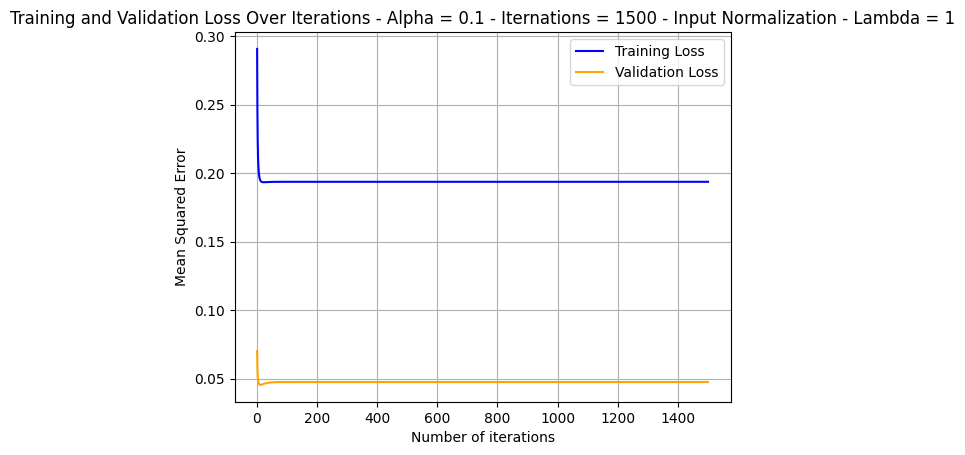

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
#housing = pd.DataFrame(pd.read_csv(file_path))
housing = pd.read_csv(url)
#housing.head()

# List of variables to map

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']
#furnishingList = ['furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
#housing[furnishingList] = housing[furnishingList].apply(furnishing_map)

#housing.head()

varlist2 = ['furnishingstatus']

# Defining the map function
def furnishing_map(a):
    return a.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Applying the function to the housing list
housing[varlist2] = housing[varlist2].apply(furnishing_map)

# Datacheck
#housing.head()

# Separate features and labels

#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

X1 = housing.values[:,1]  # get AREA input values from the second column
X2 = housing.values[:,2]  # get BEDROOM input values from the third column
X3 = housing.values[:,3]  # get BATHROOM input values from the fourth column
X4 = housing.values[:,4]  # get STORIES input values from the fith column

X5 = housing.values[:,5]  # get MAINROAD input values from the sixth column
X6 = housing.values[:,6]  # get GUESTROOM input values from the seventh column
X7 = housing.values[:,7]  # get BASEMENT input values from the eight column
X8 = housing.values[:,8]  # get HOTWATERHEATING input values from the ninth column
X9 = housing.values[:,9]  # get AIRCONDITIONING input values from the tenth column
X10 = housing.values[:,10]  # get PARKING input values from the eleventh column
X11 = housing.values[:,11]  # get PREFAREA input values from the eleventh column
X12 = housing.values[:,12]  # get furnishingstatus input values from the twelth column

y = housing.values[:,0]  # get output values from fourth column -- Y is the list here
m = len(y)  # Number of training examples

"""
# Display first 13 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])

print('X6 = ', X6[: 5])
print('X7 = ', X7[: 5])
print('X8 = ', X8[: 5])
print('X9 = ', X9[: 5])
print('X10 = ', X10[: 5])
print('X11 = ', X11[: 5])
print('X12 = ', X12[: 5])

print('y = ', y[: 5])
print('m = ', m)
"""

"""
# Scatter plot
plt.scatter(X1, y, color='red', marker='+')
plt.scatter(X2, y, color='blue', marker='x')
plt.scatter(X3, y, color='purple', marker='*')
plt.scatter(X4, y, color='orange', marker='o')
plt.scatter(X5, y, color='gray', marker='.')

plt.scatter(X5, y, color='red', marker='<')
plt.scatter(X6, y, color='blue', marker='>')
plt.scatter(X7, y, color='purple', marker='^')
plt.scatter(X8, y, color='orange', marker='d')
plt.scatter(X9, y, color='gray', marker='p')
plt.scatter(X10, y, color='orange', marker='v')
plt.scatter(X11, y, color='gray', marker='s')
plt.scatter(X12, y, color='maroon', marker='h')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Scatter plot of raw data')

# Show the plot
plt.show()
"""

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

#df_train.shape

#df_test.shape

#df_train.head()

from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_newTrain=df_train[num_vars]
#df_newTrain.head()

#df_newTrain.shape

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_newTest=df_test[num_vars]
#df_newTest.head()

#df_newTest.shape

y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

#y_newTrain.head()

#y_newTest.head()

X_newTrain = df_newTrain
X_newTest = df_newTest

#X_newTrain.head()

#X_newTest.head()

#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

X_0_train = np.ones((len(X_newTrain), 1))
#X_0_train[:5]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
#xTrain[:5]

X_0_test = np.ones((len(X_newTest), 1))
#X_0_test[:5]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
#xTest[:5]

theta = np.zeros(13)
#theta

def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0 through theta_13 =', cost)

def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0 through theta_13 =', cost)

def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        sum_reg = (lambdaValue/len(X_newTrain))*sum(theta)
        #theta -= sum_delta - sum_reg
        theta = theta - sum_delta - sum_reg
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.1
lambdaValue = 10;

theta, cost_history, test_cost_history= gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('test_cost_history =', test_cost_history)

"""
# Scatter plot
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Mainroad')
plt.scatter(xTrain[:,6], y_newTrain, color='red', marker='<', label='Guestroom')
plt.scatter(xTrain[:,7], y_newTrain, color='blue', marker='>', label='Basement')
plt.scatter(xTrain[:,8], y_newTrain, color='purple', marker='^', label='Hotwater Heating')
plt.scatter(xTrain[:,9], y_newTrain, color='orange', marker='d', label='Air Conditioning')
plt.scatter(xTrain[:,10], y_newTrain, color='gray', marker='p', label='Parking')
plt.scatter(xTrain[:,11], y_newTrain, color='red', marker='v', label='Pref Area')
plt.scatter(xTrain[:,12], y_newTrain, color='maroon', marker='v', label='Furnishing Status')

# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.1 - Iternations = 1500 - Input Normalization - Lambda = 1')
plt.legend()

# Show the plot
plt.show()
"""

plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.1 - Iternations = 1500 - Input Normalization - Lambda = 1')

# Show the plot
plt.show()